<a href="https://colab.research.google.com/github/Web-Jose/taxi-env-project/blob/main/Reinforcement_Learning_with_Q_Learning_on_Taxi_v3_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning with Q-Learning on Taxi-v3 Environment

## Import necessary libraries

This section imports the required libraries for the project: Gymnasium for the environment, NumPy for numerical computations, and Matplotlib for plotting.

In [54]:
!pip install gymnasium

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


## Initialize the Taxi environment

Here, we set up the Taxi-v3 environment from Gymnasium, which provides a discrete state-action space. The render_mode="ansi" allows us to visualize the environment in text format during evaluation.

In [55]:
# Initialize the Taxi environment
env = gym.make('Taxi-v3', render_mode="ansi")

## Initialize the Q-table

The Q-table is initialized as a zero matrix with dimensions corresponding to the number of states and actions. This table will store the Q-values for each state-action pair.

In [56]:
# Initialize the Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

## Define hyperparameters

These hyperparameters control the learning process:
- alpha: learning rate
- gamma: discount factor
- epsilon: exploration rate for epsilon-greedy strategy
- epsilon_decay: rate of decay for epsilon
- min_epsilon: minimum value for epsilon
- num_episodes: total number of training episodes
- max_steps: maximum number of steps per episode

In [57]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Initial exploration rate
epsilon_decay = 0.995  # Decay rate for epsilon
min_epsilon = 0.1  # Minimum epsilon
num_episodes = 5000  # Total episodes
max_steps = 100  # Max steps per episode

## To track rewards

This list stores the total reward obtained in each episode for analysis and visualization.

In [58]:
# To track rewards
rewards = []

## Q-Learning Algorithm
The main loop where Q-Learning is implemented over multiple episodes.
For each step in an episode:
- An action is chosen based on epsilon-greedy strategy.
- The action is performed in the environment, and the resulting reward and new state are observed.
- The Q-value for the current state-action pair is updated using the Bellman equation.
- Epsilon is decayed to reduce exploration over time.

Episode 500/5000, Total Reward: -145
Episode 1000/5000, Total Reward: -120
Episode 1500/5000, Total Reward: -6
Episode 2000/5000, Total Reward: 8
Episode 2500/5000, Total Reward: 9
Episode 3000/5000, Total Reward: -3
Episode 3500/5000, Total Reward: 11
Episode 4000/5000, Total Reward: 11
Episode 4500/5000, Total Reward: -3
Episode 5000/5000, Total Reward: 10


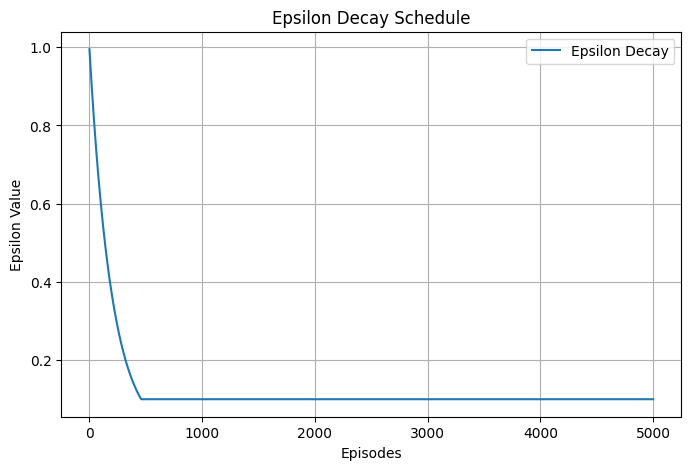

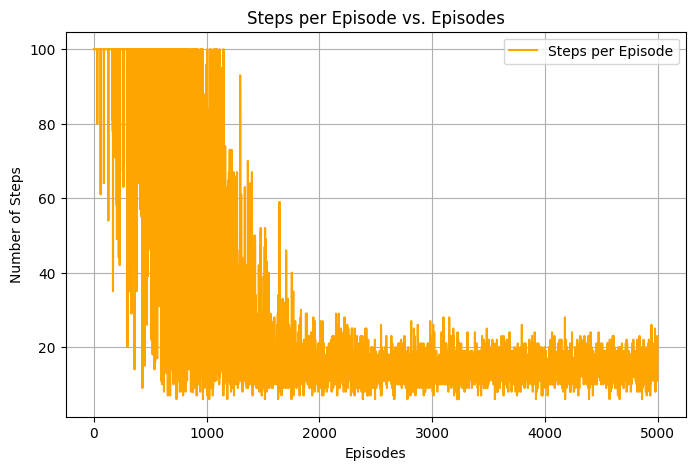

In [59]:
# Initialize variables for visualization
epsilon_values = []  # To store epsilon values
steps_per_episode = []  # To store the number of steps per episode

# Q-Learning algorithm
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    steps = 0  # Initialize steps counter

    for step in range(max_steps):
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore: choose random action
        else:
            action = np.argmax(q_table[state, :])  # Exploit: choose best action

        # Take the action and observe the outcome
        next_state, reward, done, truncated, info = env.step(action)

        # Update Q-value
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
        )

        state = next_state
        total_reward += reward
        steps += 1  # Increment steps counter

        if done:
            break

    # Store number of steps for this episode
    steps_per_episode.append(steps)

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    epsilon_values.append(epsilon)  # Store epsilon value for visualization

    rewards.append(total_reward)

    # Print progress
    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

# Plot epsilon decay
plt.figure(figsize=(8, 5))
plt.plot(epsilon_values, label="Epsilon Decay")
plt.title("Epsilon Decay Schedule")
plt.xlabel("Episodes")
plt.ylabel("Epsilon Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot steps per episode
plt.figure(figsize=(8, 5))
plt.plot(steps_per_episode, label="Steps per Episode", color='orange')
plt.title("Steps per Episode vs. Episodes")
plt.xlabel("Episodes")
plt.ylabel("Number of Steps")
plt.legend()
plt.grid(True)
plt.show()

## Plot Rewards

Visualize the total rewards obtained per episode during training.

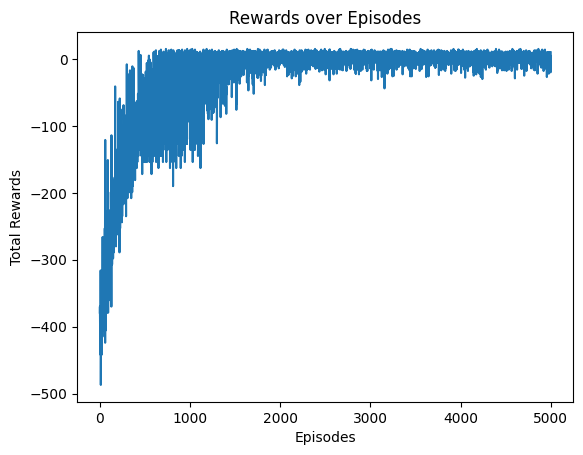

In [60]:
# Plot rewards over episodes
plt.plot(range(num_episodes), rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Rewards over Episodes')
plt.show()

## Evaluate the Trained Agent

This section tests the trained agent in the environment to observe its performance. The optimal action is selected based on the learned Q-values for each state.

In [61]:
# Evaluate the trained agent
state, _ = env.reset()
env.render()
total_reward = 0

print("Trained Agent Simulation:")
for step in range(max_steps):
    action = np.argmax(q_table[state, :])
    state, reward, done, truncated, info = env.step(action)
    env.render()
    total_reward += reward

    if done:
        break

print(f"Total reward for trained agent: {total_reward}")

Trained Agent Simulation:
Total reward for trained agent: 12
